# 清理与分析数据 - WeRateDogs!
## 收集

In [74]:
# 导入需要的库
import numpy as np
import pandas as pd
import requests
import json
from bs4 import BeautifulSoup
import re

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from PIL import Image
import IPython
import math

In [75]:
# 收集主要文件 twitter_archive_enhanced.csv 保存为 df_archive
df_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [76]:
# 收集图像预测文件 image-predictions 保存为 image-predictions.tsv
url = "https://raw.githubusercontent.com/udacity/new-dand-advanced-china/master/%E6%95%B0%E6%8D%AE%E6%B8%85%E6%B4%97/WeRateDogs%E9%A1%B9%E7%9B%AE/image-predictions.tsv"
response = requests.get(url)

with open('image-predictions.tsv','wb') as file:
    file.write(response.content)

# 读入.tsv文件并保存为数据集 df_image_pred
df_img_pred = pd.read_csv('image-predictions.tsv','\t',encoding = 'utf-8')

In [77]:
# 收集文件 3 保存为 dataframe
extra = []
with open('tweet_json.txt','r') as file:
    for line in file.readlines():
        extra.append(json.loads(line))
df_extra = pd.DataFrame(extra)

## 评估
### 目测评估

In [78]:
# 目测评估三个数据集
df_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [79]:
df_extra

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,None,None,Tue Aug 01 16:23:56 +0000 2017,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39492,False,This is Phineas. He's a mystical boy. Only eve...,None,...,False,NaN,NaN,NaN,8842,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,None,None,Tue Aug 01 00:17:27 +0000 2017,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33786,False,This is Tilly. She's just checking pup on you....,None,...,False,NaN,NaN,NaN,6480,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,None,None,Mon Jul 31 00:18:03 +0000 2017,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25445,False,This is Archie. He is a rare Norwegian Pouncin...,None,...,False,NaN,NaN,NaN,4301,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,None,None,Sun Jul 30 15:58:51 +0000 2017,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42863,False,This is Darla. She commenced a snooze mid meal...,None,...,False,NaN,NaN,NaN,8925,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,None,None,Sat Jul 29 16:00:24 +0000 2017,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",41016,False,This is Franklin. He would like you to stop ca...,None,...,False,NaN,NaN,NaN,9721,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
5,None,None,Sat Jul 29 00:08:17 +0000 2017,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891087942176911360, 'id_str'...",20548,False,Here we have a majestic great white breaching ...,None,...,False,NaN,NaN,NaN,3240,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
6,None,None,Fri Jul 28 16:27:12 +0000 2017,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890971906207338496, 'id_str'...",12053,False,Meet Jax. He enjoys ice cream so much he gets ...,None,...,False,NaN,NaN,NaN,2142,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
7,None,None,Fri Jul 28 00:22:40 +0000 2017,"[0, 118]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890729118844600320, 'id_str'...",66596,False,When you watch your owner call another dog a g...,None,...,False,NaN,NaN,NaN,19548,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
8,None,None,Thu Jul 27 16:25:51 +0000 2017,"[0, 122]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 890609177319665665, 'id_str'...",28187,False,This is Zoey. She doesn't want to be one of th...,None,...,False,NaN,NaN,NaN,4403,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
9,None,None,Wed Jul 26 15:59:51 +0000 2017,"[0, 133]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890240245463175168, 'id_str'...",32467,False,This is Cassie. She is a college pup. Studying...,None,...,False,NaN,NaN,NaN,7684,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835'

In [80]:
df_img_pred

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


### 编程评估

In [81]:
# 使用 pandas 的各种方法评估三个数据集，比如 info value_counts 等
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [82]:
df_extra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 31 columns):
contributors                     0 non-null object
coordinates                      0 non-null object
created_at                       2352 non-null object
display_text_range               2352 non-null object
entities                         2352 non-null object
extended_entities                2073 non-null object
favorite_count                   2352 non-null int64
favorited                        2352 non-null bool
full_text                        2352 non-null object
geo                              0 non-null object
id                               2352 non-null int64
id_str                           2352 non-null object
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null object
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null obj

In [83]:
df_img_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [84]:
# 检查有多少retweet的记录
df_archive.retweeted_status_id.notnull().sum()

181

In [85]:
# 检查同一条twitter记录是否包含多张照片
df_img_pred.tweet_id.duplicated().sum()

0

In [86]:
#检查评分是否有异常情况，检查分子和分母
df_archive.sort_values(by='rating_numerator', ascending = False)[['rating_numerator','rating_denominator']].head(10)

,rating_numerator,rating_denominator
979,1776,10
313,960,0
189,666,10
188,420,10
2074,420,10
1120,204,170
290,182,10
902,165,150
1779,144,120
1634,143,130


In [87]:
df_archive.sort_values(by='rating_denominator', ascending = True)[['rating_numerator','rating_denominator']].head(10)

,rating_numerator,rating_denominator
313,960,0
2335,1,2
516,24,7
1576,10,10
1575,11,10
1574,12,10
1573,7,10
1572,11,10
1563,10,10
1570,11,10


In [88]:
# 检查stage提取是否准确:重新从 text 中提取各个 stage，再与各个 stage列的情况相比较（原数据集中并未提取 blep和 snoot 两个stage)
stages = ['doggo','pupper','puppo','floofer']

for s in stages:   
    print(s, "-",(df_archive.text.str.lower().str.find(s)>-1).sum() - (df_archive[s] != 'None').sum())

doggo - 10
pupper - 26
puppo - 8
floofer - 0


### 评估结论

#### 质量 

##### `df_archive` 表格
- 按项目要求，转发的tweet不计入，故retweet不为空的181条记录应该清除
- `name`列存在745个空值并且显示为None

- `timestamp`应为日期格式
- 各 id 列应为文本格式
- 观察到原始comment中有些`rating_numerator`实际上是小数，而目前提取到的数据都为整数
- `source`可提取text并转换为category格式

- 2条异常评分：第313行的评分为 960/00, 第979行评分为1776/10
- 从`text`提取的`stage`不完整，并且没有狗狗被被标记为blep和snoot
- 存在一只狗狗有多个stage的情况

##### `df_extra` 表格
- 只包含2352条记录，比df_archive（2356条记录）少
- 多列包含大量空值

##### `df_img_pred` 表格
- 只包含2075条记录，比df_archive少（2356条记录），按项目要求不包含图片的记录应该从df_archive中清除
- `p1` `p2` `p3`各列大小写字母混用，并且词间连接符不规范（空格、下划线均有）

#### 整洁度
##### `df_archive` 表格
- 狗狗的Stage信息分成了多列来显示

##### `df_extra` 表格
- `entities` `extened_entities` `user`各列包含多个变量
- 按Tidy Data的规则，一个种类的观察形成一个单独的表格，本表数据内容也是围绕dog rating这一个观察主题，和df_archive放在一个表格里才符合要求

##### `df_img_pred` 表格
- 同上描述，本表数据内容也是围绕dog rating这一个观察主题，和df_archive放在一个表格里才符合要求


## 清理

In [89]:
# 备份三个数据集
df_archive_clean = df_archive.copy()
df_extra_clean = df_extra.copy()
df_img_pred_clean = df_img_pred.copy()

In [90]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

### 清除转发的 tweet

##### 定义
- 清除`retweet`的记录

##### 代码

In [91]:
df_archive_clean = df_archive_clean[df_archive_clean.retweeted_status_id.isnull()]

##### 测试

In [92]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

清除转发后还剩下2175条记录

### 转换格式

##### 定义
将`timestamp`转换为日期格式

##### 代码

In [93]:
# 使用 to_datetime 对日期相关列进行转换
df_archive_clean.timestamp = pd.to_datetime(df_archive_clean.timestamp)

In [94]:
# 处理 name 列，将"None"替换为空值NaN，首字母大写
df_archive_clean.name = df_archive_clean.name.replace('None',np.NaN).str.capitalize()

##### 测试

In [95]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null datetime64[ns]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          1495 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: datetime64[ns](1), flo

### 提取Source

##### 定义
提取html代码中的文本，并转换为category格式

##### 代码

In [96]:
df_archive_clean.source.unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

In [97]:
# 使用 BeautifulSoup 提取 <a> 标记
chr=[]
for i in df_archive_clean.source:
    chr.append(BeautifulSoup(i).a.text)

In [98]:
# 将提取的数值传递给 source 列，并转换为 category 格式
df_archive_clean['source']=chr
df_archive_clean['source']=df_archive_clean['source'].astype('category')

##### 测试

In [99]:
df_archive_clean.source.unique()

[Twitter for iPhone, Twitter Web Client, Vine - Make a Scene, TweetDeck]
Categories (4, object): [Twitter for iPhone, Twitter Web Client, Vine - Make a Scene, TweetDeck]

### 重新提取评分
##### 代码

In [138]:
# 重新从 text 中重新提取 rate 到新变量 rate
rate = []
for t in df_archive_clean.text:
    rate.append(','.join(list(dict.fromkeys(re.findall('\d+\.?\d?/\d+',t.lower().replace('floof','floofer'))))).replace("'',","").split('/')[0])

df_archive_clean['rating_numerator']=rate

In [140]:
#将提取到的 string 格式评分转换为浮点格式
df_archive_clean['rating_numerator']=df_archive_clean['rating_numerator'].astype(float)

##### 测试

In [169]:
df_archive_clean['rating_numerator']

0       13.0
1       13.0
2       12.0
3       13.0
4       12.0
5       13.0
6       13.0
7       13.0
8       13.0
9       14.0
10      13.0
11      13.0
12      13.0
13      12.0
14      13.0
15      13.0
16      12.0
17      13.0
18      13.0
20      12.0
21      13.0
22      14.0
23      13.0
24      13.0
25      12.0
26      13.0
27      13.0
28      13.0
29      12.0
30      12.0
        ... 
2326     2.0
2327     7.0
2328     9.0
2329    11.0
2330     6.0
2331     8.0
2332    10.0
2333     9.0
2334     3.0
2335     1.0
2336    11.0
2337    10.0
2338     1.0
2339    11.0
2340     8.0
2341     9.0
2342     6.0
2343    10.0
2344     9.0
2345    10.0
2346     8.0
2347     9.0
2348    10.0
2349     2.0
2350    10.0
2351     5.0
2352     6.0
2353     9.0
2354     7.0
2355     8.0
Name: rating_numerator, Length: 2175, dtype: float64

### 处理异常评分

##### 定义
根据tweet原文判断2条异常评分产生原因并作相应处理

##### 代码

In [145]:
# 检查记录313的推特原文，发现评分应取13/10，手动修正之
df_archive_clean.text[313]

"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho"

In [146]:
df_archive_clean.rating_numerator[313]=13
df_archive_clean.rating_denominator[313]=10

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [147]:
# 检查记录979的推特原文，发现如此评分是意为之，不是数据错误
df_archive_clean.rating_numerator[979]

1776.0

##### 测试

In [149]:
df_archive_clean.sort_values(by='rating_numerator', ascending = False)[['rating_numerator','rating_denominator']].head(10)

,rating_numerator,rating_denominator
979,1776.0,10
189,666.0,10
188,420.0,10
2074,420.0,10
1120,204.0,170
290,182.0,10
902,165.0,150
1779,144.0,120
1634,143.0,130
1635,121.0,110


### 补充缺失的Stage数据

##### 定义
重新从tweet原文中提取stage数据

##### 代码

In [150]:
# 重新从 text 中提取 stage 到新变理 stages
stage = []
for t in df_archive_clean.text:
    stage.append(','.join(list(dict.fromkeys(re.findall('(doggo|pupper|puppo|floofer|blep|snoot)',t.lower().replace('floof','floofer'))))).replace("'',",""))

df_archive_clean['stages']=stage   

##### 测试

In [171]:
df_archive_clean['stages'].value_counts()

                  1760
pupper             248
doggo               81
floofer             36
puppo               31
doggo,pupper         6
pupper,doggo         4
blep                 3
doggo,floofer        2
puppo,doggo          2
floofer,pupper       1
pupper,blep          1
Name: stages, dtype: int64

### 检查包含多个stage的情况

In [152]:
for i in df_archive_clean[df_archive_clean.stages.str.len()>7].text:
    print(i,"\n")

This is Roscoe. Another pupper fallen victim to spontaneous tongue ejections. Get the BlepiPen immediate. 12/10 deep breaths Roscoe https://t.co/RGE08MIJox 

I have stumbled puppon a doggo painting party. They're looking to be the next Pupcasso or Puppollock. All 13/10 would put it on the fridge https://t.co/cUeDMlHJbq 

Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel 

At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk 

This is Dido. She's playing the lead role in "Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple." 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7 

Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho 

Like doggo, like pupper version 2. 

&gt; 原文确实包含2个stage，并非提取错误

### 整理预测数据

##### 定义

##### 代码

In [153]:
df_img_pred_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [154]:
# 只选取最有把握的 p1 参与分析
#df_img_pred_clean = df_img_pred_clean[['tweet_id','p1','p1_conf','p1_dog']]

In [155]:
# p1，p2，p3转换为小写字母，并替换下划线为空格
df_img_pred_clean[['p1','p2','p3']]=df_img_pred_clean[['p1','p2','p3']].apply(lambda x: x.str.lower().str.replace("_"," "))

In [156]:
df_img_pred_clean[['p1','p2','p3']].head()

,p1,p2,p3
0,welsh springer spaniel,collie,shetland sheepdog
1,redbone,miniature pinscher,rhodesian ridgeback
2,german shepherd,malinois,bloodhound
3,rhodesian ridgeback,redbone,miniature pinscher
4,miniature pinscher,rottweiler,doberman


##### 测试

### 合并3个表

##### 定义
- 使用 pd.merge 合并3个表
- 清除没有图片的记录
##### 代码

In [163]:
# 合并 df_archive 和 df_extra
df_merge = pd.merge(df_archive_clean,df_extra_clean,left_on='tweet_id',right_on='id',how='inner')

In [164]:
# 合并 df_archive 和 df_image_pred
# 选择 inner 方式，以筛除没有图片的记录
df_merge = pd.merge(df_merge,df_img_pred_clean,on='tweet_id',how='inner')

##### 测试

In [165]:
# 测试问题三是否正确清理完成
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 61 columns):
tweet_id                         1994 non-null int64
in_reply_to_status_id_x          23 non-null float64
in_reply_to_user_id_x            23 non-null float64
timestamp                        1994 non-null datetime64[ns]
source_x                         1994 non-null category
text                             1994 non-null object
retweeted_status_id              0 non-null float64
retweeted_status_user_id         0 non-null float64
retweeted_status_timestamp       0 non-null object
expanded_urls                    1994 non-null object
rating_numerator                 1994 non-null float64
rating_denominator               1994 non-null int64
name                             1448 non-null object
doggo                            1994 non-null object
floofer                          1994 non-null object
pupper                           1994 non-null object
puppo                        

In [167]:
# 筛选出需要分析的列
df_dogs=df_merge[["tweet_id", "timestamp", "source_x", "text", "rating_numerator", "rating_denominator", "name","stages", "favorite_count", "retweet_count", "jpg_url", "p1", "p1_conf", "p1_dog", "p2", "p2_conf", "p2_dog", "p3", "p3_conf", "p3_dog", 
]]
df_dogs.head()

,tweet_id,timestamp,source_x,text,rating_numerator,rating_denominator,name,stages,favorite_count,retweet_count,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13.0,10,Phineas,,39492,8842,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13.0,10,Tilly,,33786,6480,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12.0,10,Archie,,25445,4301,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13.0,10,Darla,,42863,8925,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,paper towel,0.170278,False,labrador retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12.0,10,Franklin,,41016,9721,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,True,english springer,0.225770,True,german short-haired pointer,0.175219,True


### 存储清理后的主数据集

In [196]:
# 将清理后的主数据集保存为 csv 文件或者 SQLite 数据库文件
df_dogs.to_csv('twitter_archive_master.csv',index=False)

## 分析和可视化

&gt; 提示：
- 在 Notebook 使用 pandas 或 SQL 分析主数据集，并生成至少三（3）个独立的结论。
- 在 Notebook 中使用 Python 绘图库或在 Tableau 中至少生成一（1）个可视化图表。


### 观察到的时间相关性

In [174]:
# 分析或可视化代码
df_dogs.groupby('source_x').tweet_id.count()

source_x
TweetDeck                11
Twitter Web Client       28
Twitter for iPhone     1955
Vine - Make a Scene       0
Name: tweet_id, dtype: int64

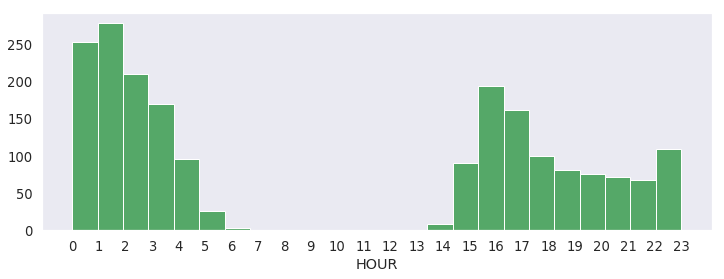

In [175]:
sns.set_style("dark")
#sns.distplot(df_dogs.timestamp.dt.hour,rug=False,kde=False,bins=24,axlabel='HOUR',color='g')

df_dogs.timestamp.dt.hour.hist(bins=24,figsize=(12,4),grid=False,color='g')
plt.xticks(np.arange(24))
plt.xlabel("HOUR");

与上面分析或可视化相关的见解或说明

&gt; 分析显示数据集中tweet的量每天下午4点有个小高峰，23点后迅速上升，凌晨1点达到全天峰值(UTC时间)
但因为数据集中未找到有效的time zone信息(User中包含time zone项目，但值为None)，不清楚用户具体的使用偏好时段，猜测主要是由欧洲和美国两个地区用户叠加的结果

In [176]:
df_dogs_2016 = df_dogs.query('timestamp>"2016-1-1" & timestamp<"2017-1-1"')

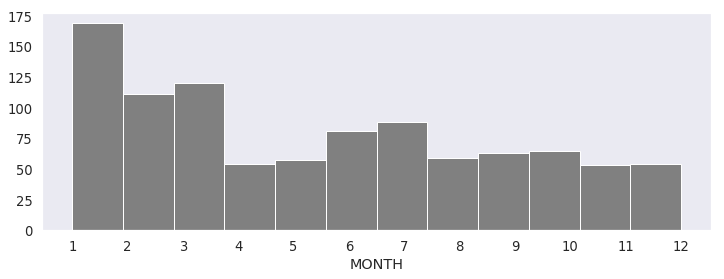

In [177]:
df_dogs_2016.timestamp.dt.month.hist(bins=12,figsize=(12,4),grid=False,color='grey')
plt.xticks(np.arange(1,13))
plt.xlabel("MONTH");

&gt; 从月份上来看，各月差别不大，1月份有个小高峰

### 评分偏好

In [178]:
(df_dogs.rating_numerator/df_dogs.rating_denominator).sort_values(ascending=False).head(10)

726     177.600000
1718     42.000000
503       7.500000
385       3.428571
553       2.700000
1374      2.600000
153       1.400000
332       1.400000
333       1.400000
36        1.400000
dtype: float64

In [179]:
df_dogs.query('rating_numerator/rating_denominator>=1').shape[0]/df_dogs.shape[0]

0.7923771313941825

&gt; 超过80%的用户都给狗狗打了100分以上（分子&gt;分母），可见喜爱之情溢于言表

### 名字偏好

In [180]:
# 最受欢迎的名字
df_dogs.groupby('name').tweet_id.count().sort_values(ascending=False).head(10)

name
A          55
Charlie    11
Lucy       10
Oliver     10
Cooper     10
Penny       9
Tucker      9
Sadie       8
Winston     8
The         7
Name: tweet_id, dtype: int64

&gt; 出现最多的名字是 A ，但看起来不像狗狗的名字？不清楚名字信息是从哪里提取的，无法作进一步分析

### Tweet来源分布情况

In [181]:
df_dogs.groupby('source_x').tweet_id.count()

source_x
TweetDeck                11
Twitter Web Client       28
Twitter for iPhone     1955
Vine - Make a Scene       0
Name: tweet_id, dtype: int64

&gt; 显示绝大部分来源于Twitter for iPhone，可见绝大部分用户使用手机刷Twitter，但不清楚为何没有Android来源的数据

### Favorite 和 Retweet 分析

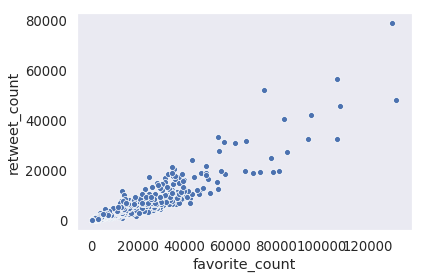

In [182]:
# 对两者作散点图
sns.scatterplot(df_dogs.favorite_count,df_dogs.retweet_count);

&gt; 可观察到二者大体呈正相关, 但显然也有很多人直接转发而并未点点favorite favorite超过40000，或者retweet超过20000的tweet很少

### Stage分布情况

In [183]:
# 计算各个 stage 的出现次数
stages = ['doggo','pupper','puppo','floofer','blep','snoot']

stage_count=[]
for s in stages:
    stage_count.append((df_dogs.stages.str.find(s)>-1).sum())
stage_count

[80, 237, 29, 37, 4, 0]

In [184]:
# 计算包含 Stage 信息的记录的比例
df_dogs.query('stages!=""').tweet_id.count()/df_dogs.shape[0]

0.18655967903711135

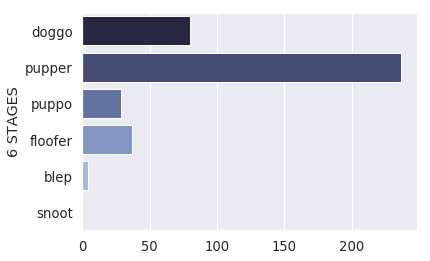

In [185]:
# 作 bar plot 演示各stage所占比例
sns.set(style="darkgrid",font_scale=1.2)
sns.barplot(stage_count,stages,orient='h',palette='ch:s=3,r=-.1,h=1_r')
plt.ylabel("6 STAGES");

&gt; `pupper`分类显著多于其它分类，但总体来说只有少数tweet提供了stage标记（不足20%）

In [186]:
# 定义一个函数ImageMatrix用以显示图片方阵
def ImageMatrix(df_urls,vs=False):
    i=1
    fig = plt.figure(figsize=(12,12))
    rows = columns = math.ceil(math.sqrt(df_urls.shape[0]))
    size=300,300

    for url in df_urls.jpg_url:
        im = Image.open(requests.get(url, stream=True).raw)
        im.thumbnail(size)
        fig.add_subplot(rows, columns, i)
        plt.axis('off')
        if vs == True:
            plt.title(df_urls.p1.reset_index(drop=True)[i-1] + '\n' + df_urls.p2.reset_index(drop=True)[i-1])
            plt.subplots_adjust(hspace=.4)
        plt.imshow(im)
        i+=1

    plt.show()

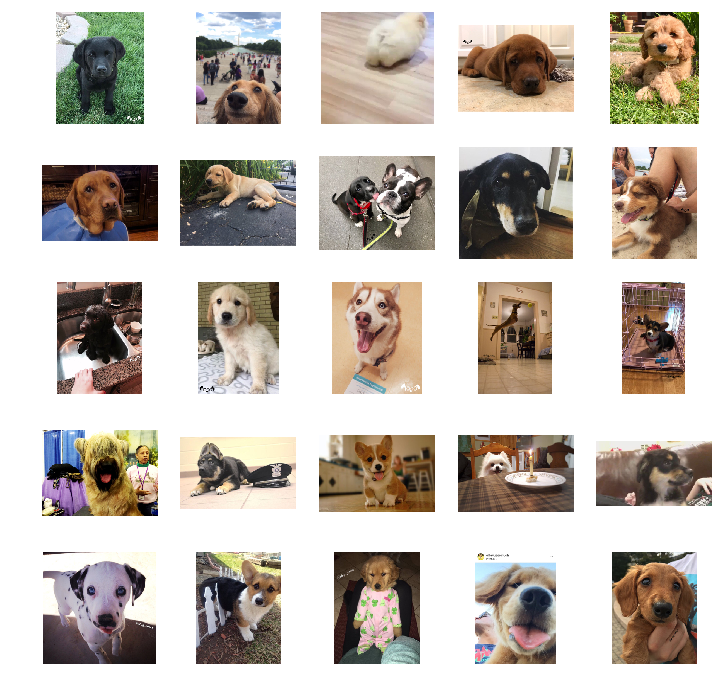

In [187]:
ImageMatrix(df_dogs.query('stages == "pupper"').dropna(subset=['jpg_url']).head(25));

### 狗狗品种预测情况

In [188]:
# 提取新数据集，只分析有预测值的记录
df_dogs_valid = df_dogs.dropna(subset=['p1'])

In [189]:
# 查看多少狗狗被 AI 认为不是狗
df_dogs_valid.groupby('p1_dog').p1_dog.count()

p1_dog
False     517
True     1477
Name: p1_dog, dtype: int64

In [190]:
# 最受欢迎的犬种 TOP 10
df_dogs_valid.query('p1_dog == True').groupby('p1').p1.count().sort_values(ascending=False).head(10)

p1
golden retriever      139
labrador retriever     95
pembroke               88
chihuahua              79
pug                    54
chow                   41
samoyed                40
toy poodle             38
pomeranian             38
malamute               29
Name: p1, dtype: int64

In [191]:
# 被 AI 判熂为不是狗的物体 TOP 10
df_dogs_valid.query('p1_dog == False').groupby('p1').p1.count().sort_values(ascending=False).head(10)

p1
seat belt      21
teddy          18
web site       15
tennis ball     9
dingo           9
doormat         7
siamese cat     7
swing           7
hamster         7
bath towel      7
Name: p1, dtype: int64

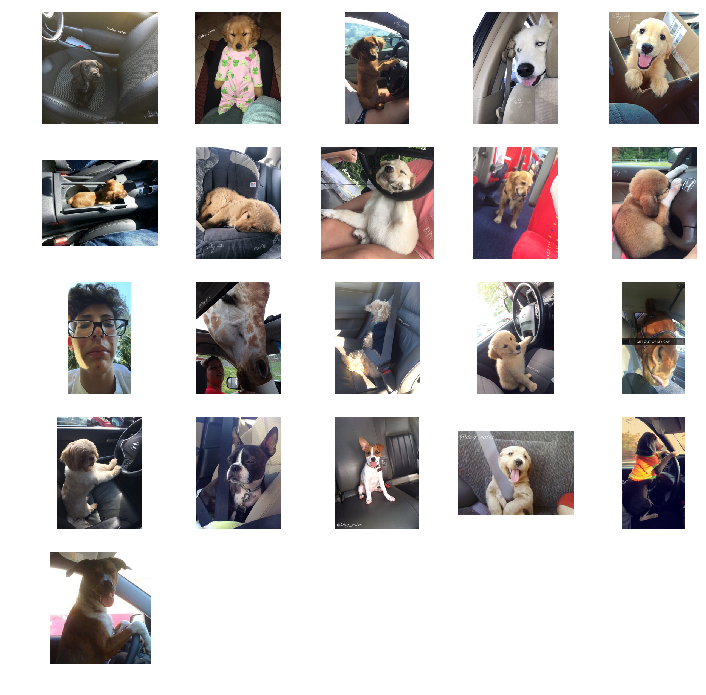

In [192]:
# 显示被误认为 seat_belt 的图片
ImageMatrix(df_dogs_valid.query('p1=="seat belt"'))

&gt; 可以看出这些图片大都是在车里的狗狗，有几只甚至都没有系安全带

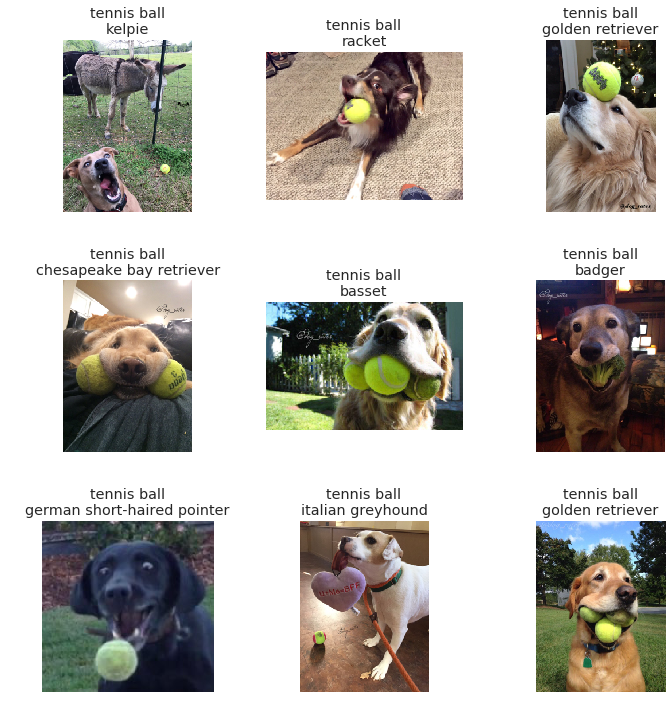

In [193]:
# 显示被误认为 tennis_ball 的图片
ImageMatrix(df_dogs_valid.query('p1=="tennis ball"'),vs=True)

&gt; 这些图片里都有网球。可以看到有些图片里网球的影像其实很小，而狗狗的占了绝大多数画面，但算法仍认为它是网球

In [194]:
# 统计 p1、p2 两次预测对 “是不是狗“ 左右为难的记录
df_dogs_valid['p1_p2'] = df_dogs_valid.p1_conf - df_dogs_valid.p2_conf
df_dogs_valid.query('p1_dog != p2_dog').sort_values('p1_p2').head()[['p1_dog','p2_dog','p1_p2']]

,p1_dog,p2_dog,p1_p2
1480,False,True,0.000253
3,False,True,0.002192
1745,True,False,0.002727
1023,False,True,0.004943
1881,True,False,0.005071


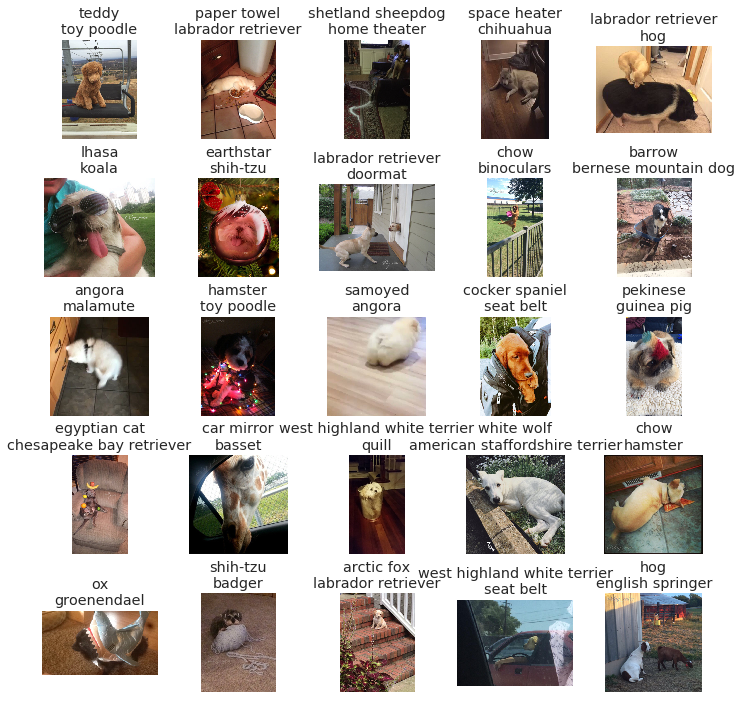

In [195]:
# 显示这些图片
ImageMatrix(df_dogs_valid.query('p1_dog != p2_dog').sort_values('p1_p2').head(25),vs=True)

&gt; 可以看出有一些情况是因为狗狗占画面比例太小（比如同一张图里出现狗和猪），或者确实难以分辨（比如玩具贵宾和泰迪熊），但似乎看不出太多规律

## 参考
- https://github.com/jfwalkenford/Wrangle-Act/
- https://stackoverflow.com/questions/46615554/how-to-display-multiple-images-in-one-figure-correctly/46616645

&gt; 更多说明
- 数据整理过程描述文件 [`wrangle_report.pdf`](./wrangle_report.pdf)
- 数据分析和可视化描述文件 [`act_report.pdf`](./act_report.pdf)